In [1]:
import numpy as np
import random as r
import glob
import skimage.io as io
import matplotlib.pyplot as plt
import keras
import cv2


In [2]:
#!pip install --user keras==2.4.3

In [3]:
#!pip install --user tensorflow==2.5.0

In [2]:
path = "C:\\Users\\user\\Desktop\\TRAINING\\"

In [3]:
files=glob.glob(path + "**\\*OVERLAY\\*.png",recursive=True)

In [4]:
files2 =glob.glob(path + "**\\*MASK\\*.png",recursive=True)

In [5]:
len(files)

2223

In [6]:
örnek = files2[1]

In [7]:
o = files[1]
o = io.imread(o, plugin = "simpleitk")

In [8]:
img = io.imread(örnek, plugin = "simpleitk")

In [6]:
o


array([[[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       ...,

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0

In [9]:
img.dtype

dtype('uint8')

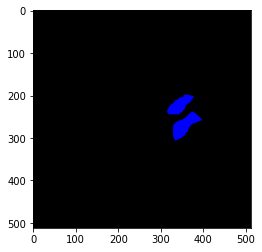

In [10]:
plt.imshow(img)

In [11]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
import random as r
 
def seg_array(path):
    files = glob.glob(path,recursive=True)
    img_liste = []
    r.seed(9)
    r.shuffle(files)
    for file in files:
        img = io.imread(file,plugin='simpleitk')
        #[:,:,1]
        img = cv2.resize(img,(256,256))
     #   img = np.expand_dims(img,axis = -1)
        img.astype('float32')
        img_liste.append(img)
    return img_liste

def train_array(path):
    files = glob.glob(path,recursive=True)
    img_liste = []
    r.seed(9)
    r.shuffle(files)
    for file in files:
        img = io.imread(file,plugin='simpleitk')
        img = cv2.resize(img,(256,256))
        img.astype('float32')
        img_liste.append(img)
    return img_liste    
     

In [6]:
#train=train_array(path+'**\\*OVERLAY\\*.png')

In [12]:
x_train = np.array(train_array(path+'**\\*OVERLAY\\*.png'), dtype = np.float32)

In [8]:
  # oldu hocaam tamamdır kolay gelsin.cok tesekurler sizede 

In [9]:
#seg=seg_array(path+'**\\*MASK\\*.png')

In [13]:
y_train = np.array(seg_array(path+'**\\*MASK\\*.png') , dtype = np.float32)

In [14]:
x_train.shape, x_train.dtype, y_train.shape, y_train.dtype

((2223, 256, 256, 4), dtype('float32'), (2223, 256, 256, 3), dtype('float32'))

In [11]:
seg[1].shape , train[1].shape, x_train.shape, len(x_train)

((224, 224, 3), (224, 224, 4), (2223, 224, 224, 4), 2223)

In [12]:
zeros = np.zeros((len(x_train), 256,256, 1), dtype = np.float32)
len(zeros), zeros.shape

(2223, (2223, 256, 256, 1))

In [13]:
y_train = np.concatenate((y_train, zeros), axis = 3)

In [14]:
y_train.shape, x_train.shape

((2223, 256, 256, 4), (2223, 256, 256, 4))

In [22]:

from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.layers import Input, merge, UpSampling2D,BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import tensorflow as tf
from keras.losses import binary_crossentropy

K.set_image_data_format('channels_last')

def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    dice = K.mean((2. * intersection + smooth)/(union + smooth), axis=0)
    return dice

"""
def dice_coef(y_true, y_pred):
    smooth = 0.005 
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
"""

def dice_coef_loss(y_true, y_pred):
    return dice_coef(y_true, y_pred, smooth=1)

def unet_model():
    
    inputs = Input(shape= (256 , 256, 4))
    
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same') (inputs)
    batch1 = BatchNormalization(axis=1)(conv1)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same') (batch1)
    print(conv1.shape)
    batch1 = BatchNormalization(axis=1)(conv1)
    pool1 = MaxPooling2D((2, 2)) (batch1)
    pool1 = Dropout(0.25)(pool1)
    
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same') (pool1)
    batch2 = BatchNormalization(axis=1)(conv2)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same') (batch2)
    print(conv2.shape)
    batch2 = BatchNormalization(axis=1)(conv2)
    pool2 = MaxPooling2D((2, 2)) (batch2)
    pool2 = Dropout(0.5)(pool2)
    
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same') (pool2)
    batch3 = BatchNormalization(axis=1)(conv3)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same') (batch3)
    print(conv3.shape)
    batch3 = BatchNormalization(axis=1)(conv3)
    pool3 = MaxPooling2D((2, 2)) (batch3)
    pool3 = Dropout(0.5)(pool3)
    
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same') (pool3)
    batch4 = BatchNormalization(axis=1)(conv4)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same') (batch4)
    print(conv4.shape)
    batch4 = BatchNormalization(axis=1)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2)) (batch4)
    pool4 = Dropout(0.5)(pool4)
    
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same') (pool4)
    batch5 = BatchNormalization(axis=1)(conv5)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same') (batch5)
    print(conv5.shape)
    batch5 = BatchNormalization(axis=1)(conv5)
    
    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same') (batch5)
    up6 = concatenate([up6, conv4], axis=3)
    print(up6.shape)
    up6 = Dropout(0.5)(up6)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same') (up6)
    batch6 = BatchNormalization(axis=1)(conv6)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same') (batch6)
    print(conv6.shape)
    batch6 = BatchNormalization(axis=1)(conv6)
    
    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same') (batch6)
    up7 = concatenate([up7, conv3], axis=3)
    print(up7.shape)
    up7 = Dropout(0.5)(up7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same') (up7)
    batch7 = BatchNormalization(axis=1)(conv7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same') (batch7)
    print(conv7.shape)
    batch7 = BatchNormalization(axis=1)(conv7)
    
    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (batch7)
    up8 = concatenate([up8, conv2], axis=3)
    print(up8.shape)
    up8 = Dropout(0.5)(up8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same') (up8)
    batch8 = BatchNormalization(axis=1)(conv8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same') (batch8)
    print(conv8.shape)
    batch8 = BatchNormalization(axis=1)(conv8)
    
    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (batch8)
    up9 = concatenate([up9, conv1], axis=3)
    print(up9.shape)
    up9 = Dropout(0.5)(up9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same') (up9)
    batch9 = BatchNormalization(axis=1)(conv9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same') (batch9)
    print(conv9.shape)
    batch9 = BatchNormalization(axis=1)(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(batch9)
    print(conv10.shape)
    
    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(lr=1e-4), loss=dice_coef_loss, metrics=[dice_coef])
    
    return model


In [23]:
model = unet_model()
model.save_weights('C:\\Users\\user\\Desktop\\TRAINING\\u-net\\unet_model.h5')

(None, 256, 256, 64)
(None, 128, 128, 128)
(None, 64, 64, 256)
(None, 32, 32, 512)
(None, 16, 16, 1024)
(None, 32, 32, 1024)
(None, 32, 32, 512)
(None, 64, 64, 512)
(None, 64, 64, 256)
(None, 128, 128, 256)
(None, 128, 128, 128)
(None, 256, 256, 128)
(None, 256, 256, 64)
(None, 256, 256, 1)


In [ ]:
history = model.fit(x_train,
          y_train,
          validation_split = 0.30,
          batch_size = 8,
          epochs = 5,
          shuffle = True,
          verbose = 1)

Epoch 1/5
195/195 [==============================] - 6923s 35s/step - loss: 0.0486 - dice_coef: 0.0486 - val_loss: 2.0938e-04 - val_dice_coef: 2.0925e-04
Epoch 2/5
 59/195 [========>.....................] - ETA: 1:10:52 - loss: 6.6321e-05 - dice_coef: 6.6321e-05

In [22]:
x_train.shape, y_train.shape, x_train.dtype, y_train.dtype

((2223, 256, 256, 4), (2223, 256, 256, 3), dtype('float32'), dtype('float32'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


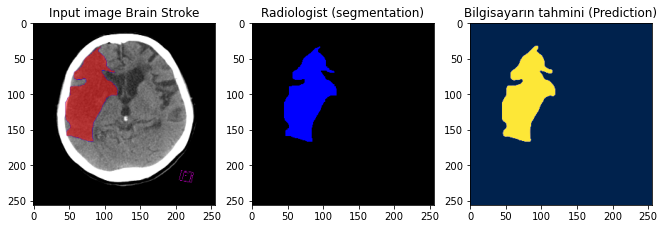

In [19]:
x    = 1500
renk = {0:'magma',
        1:'viridis',
        2:'gray',
        3:'inferno',
        4:'cividis',
        5:'hot', }
a    = 4

exp = np.expand_dims(x_train[x],axis=0)
pred = model.predict(exp)


fig = plt.figure(figsize=(15,10))

plt.subplot(141)
plt.title("Input image Brain Stroke")
plt.imshow(x_train[x].astype("uint8"),cmap = renk[a])

plt.subplot(142)
plt.title('Radiologist (segmentation)')
plt.imshow( y_train[x], cmap = renk[a])

plt.subplot(143)
plt.title('Bilgisayarın tahmini (Prediction)')
plt.imshow( pred[0],cmap = renk[a])


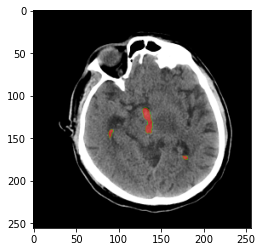

In [51]:
plt.imshow(x_train[567].astype("uint8"))

In [20]:
print(history.history.keys())

dict_keys(['loss', 'dice_coef', 'val_loss', 'val_dice_coef'])


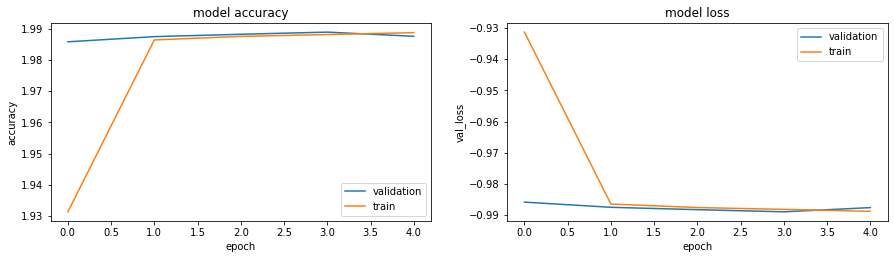

In [21]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(history.history['val_dice_coef'])  
plt.plot(history.history['dice_coef'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['validation', 'train']) 
    
plt.subplot(222)  
plt.plot(history.history['val_loss'])  
plt.plot(history.history['loss'])  
plt.title('model loss')  
plt.ylabel('val_loss')  
plt.xlabel('epoch')  
plt.legend(['validation', 'train']) 

plt.show()